In [1]:
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import model_from_json
import numpy as np
from keras.utils import plot_model

font = {'family': 'liberation sans',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }

/home/tintin/apps/python_envs/science_python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Demo data generator by transforming images
'''datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
'''
img = load_img('/home/tintin/core/Projects/Pap_Keras/data/train/normal/209047881-209048017-001.BMP')  # this is a PIL image
#img = load_img('/home/tintin/core/Code/python/machine_learning/cats_dogs/cats_dogs_keras/data/train/cats/cat.10.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
'''
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cell', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely'''

(280, 291, 3)
(1, 280, 291, 3)


"\ni = 0\nfor batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cell', save_format='jpeg'):\n    i += 1\n    if i > 20:\n        break  # otherwise the generator would loop indefinitely"

In [7]:
#Make the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 512, 512)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_10x/train/',  # this is the target directory
        target_size=(512,512),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_10x/test/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')
model.load_weights('first_try.h5') #load previous weights
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
#Save the model
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
#Save weights
#model.save_weights('first_try.h5')  # always save your weights after training or during training

Found 181 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 3175s 25s/step - loss: 0.6226 - acc: 0.8295 - val_loss: 0.4734 - val_acc: 0.8929
Epoch 2/10
125/125 [==============================] - 3124s 25s/step - loss: 0.3346 - acc: 0.8846 - val_loss: 0.2367 - val_acc: 0.8929
Epoch 3/10
125/125 [==============================] - 3125s 25s/step - loss: 0.2360 - acc: 0.9218 - val_loss: 0.1998 - val_acc: 0.9286
Epoch 4/10
125/125 [==============================] - 3117s 25s/step - loss: 0.1657 - acc: 0.9411 - val_loss: 0.0993 - val_acc: 0.9643
Epoch 5/10
125/125 [==============================] - 3157s 25s/step - loss: 0.1766 - acc: 0.9514 - val_loss: 0.2853 - val_acc: 0.9643
Epoch 6/10
125/125 [==============================] - 3122s 25s/step - loss: 0.1968 - acc: 0.9516 - val_loss: 0.2722 - val_acc: 0.9643
Epoch 7/10
125/125 [==============================] - 3116s 25s/step - loss: 0.1311 - acc: 0.9555 - val_loss:

In [8]:
#Save model weight
model.save_weights('second_try_10x.h5')

In [1]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load pretrained weights into new model
loaded_model.load_weights("second_try_10x.h5")
print("Loaded saved model and weights from training session")

%matplotlib inline
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

batch_size=16
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_10x/test/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')


for f in validation_generator.filenames:
    img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_10x/test/%s' % f)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape) 
    v =  int((loaded_model.predict(x,batch_size=1))[0][0])
    diagnoses = ['Not PTCA', 'PTCA']
    print("Original %s \t Result %s" %(f,diagnoses[v]))

NameError: name 'model_from_json' is not defined

In [5]:
#Plot model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
plot_model(loaded_model,to_file='model.png',show_shapes=True)

In [9]:
#40x
batch_size = 16
model=loaded_model
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_40x/train/',  # this is the target directory
        target_size=(512,512),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_40x/test/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')
#model.load_weights('first_try.h5') #load previous weights
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
#Save the model
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
#Save weights
model.save_weights('first_try_40x.h5')  # always save your weights after training or during training

Found 141 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 2932s 23s/step - loss: 0.5271 - acc: 0.8574 - val_loss: 0.0553 - val_acc: 1.0000
Epoch 2/10
125/125 [==============================] - 2929s 23s/step - loss: 0.3453 - acc: 0.9288 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 3/10
125/125 [==============================] - 2927s 23s/step - loss: 0.3638 - acc: 0.9393 - val_loss: 0.2267 - val_acc: 0.8500
Epoch 4/10
125/125 [==============================] - 2921s 23s/step - loss: 0.2801 - acc: 0.9449 - val_loss: 0.0266 - val_acc: 1.0000
Epoch 5/10
125/125 [==============================] - 2920s 23s/step - loss: 0.3464 - acc: 0.9575 - val_loss: 0.1443 - val_acc: 0.9500
Epoch 6/10
125/125 [==============================] - 2930s 23s/step - loss: 0.3219 - acc: 0.9420 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 7/10
125/125 [==============================] - 2935s 23s/step - loss: 0.3116 - acc: 0.9436 - val_loss:

In [6]:
loaded_model.load_weights('first_try_40x.h5')
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_40x/test/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')

font = {'family': 'liberation sans',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }
for f in validation_generator.filenames:
    img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/data_512/mag_40x/test/%s' % f)
    #plt.imshow(img)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape) 
    v =  int((loaded_model.predict(x,batch_size=1))[0][0])
    diagnoses = ['Not PTCA', 'PTCA']
    #plt.text(10,30,'Result: %s' % diagnoses[v],fontdict=font)
    #plt.text(10,60,'Original: %s' % f,fontdict=font)
    #plt.show()
    print("Original %s \t Result %s" % (f,diagnoses[v]))

Found 20 images belonging to 2 classes.
Original non_ptca_40x/20180314_213517.jpg 	 Result Not PTCA
Original non_ptca_40x/20180318_120943.jpg 	 Result Not PTCA
Original non_ptca_40x/20180622_210130-3.jpg 	 Result Not PTCA
Original non_ptca_40x/fn_244_2018_chandigarh_hurthle_neoplasm_14-2.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_005.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_017.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_023.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_026.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_031.jpg 	 Result Not PTCA
Original non_ptca_40x/non_ptca_40x_034.jpg 	 Result Not PTCA
Original ptca_40x/20180607_150116.jpg 	 Result PTCA
Original ptca_40x/20180607_151133-2.jpg 	 Result PTCA
Original ptca_40x/20180607_151133.jpg 	 Result PTCA
Original ptca_40x/20180616_135557.jpg 	 Result PTCA
Original ptca_40x/20180616_135701-3.jpg 	 Result PTCA
Original ptca_40x/20180616_135709-4.jpg 	 Result PTCA
Origi

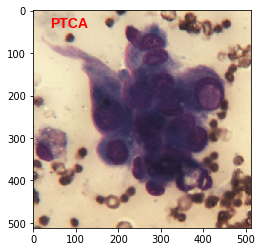

In [10]:
#Random tests
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('second_try_10x.h5')
img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/cytocon_submission/intranuclear-inclusion-3.jpg')
plt.imshow(img)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) 
v =  int((loaded_model.predict(x,batch_size=1))[0][0])
diagnoses = ['Not PTCA', 'PTCA']
plt.text(40,40,diagnoses[v],fontdict=font)
plt.show()

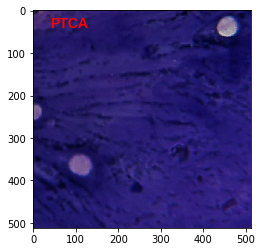

In [12]:
#Random tests
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('second_try_10x.h5')
img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/eval/mag_10x/non_ptca/10x_colloid_2.jpg')
plt.imshow(img)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) 
v =  int((loaded_model.predict(x,batch_size=1))[0][0])
diagnoses = ['Not PTCA', 'PTCA']
plt.text(40,40,diagnoses[v],fontdict=font)
plt.show()

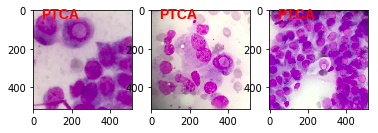

In [41]:
#Random tests
%matplotlib inline
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('second_try_10x.h5')
diagnoses = ['Not PTCA', 'PTCA']
files = ['/home/tintin/Downloads/p1.jpg','/home/tintin/Downloads/p2.jpg','/home/tintin/Downloads/p3.jpg']
l = len(files)
fig, axes = plt.subplots(1,l)

i=0
for f in files:
    img = load_img(f)
    axes[i].imshow(img)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape) 
    v =  int((loaded_model.predict(x,batch_size=1))[0][0])
    axes[i].text(40,40,diagnoses[v],fontdict=font)
    i += 1
plt.show()

<IPython.core.display.Javascript object>


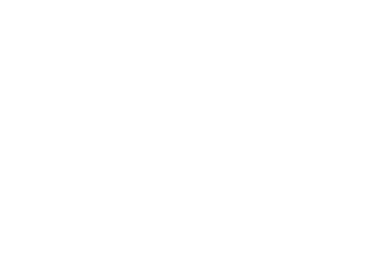

<IPython.core.display.Javascript object>


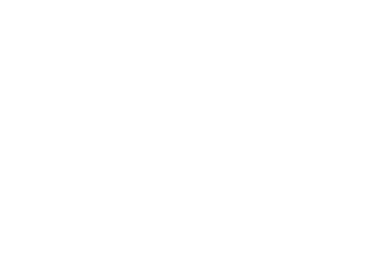

In [45]:
%matplotlib tk
f,a = plt.subplots(1,3,sharex=True)
a[1].plot(2,3,'.')
plt.show()

In [11]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('second_try_10x.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size=16
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/eval/mag_10x/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')

font = {'family': 'liberation sans',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }
csvfile_10x = open("10x.csv","w+") 
for f in validation_generator.filenames:
    img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/eval/mag_10x/%s' % f)
    #plt.imshow(img)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape) 
    v =  int((loaded_model.predict(x,batch_size=1))[0][0])
    diagnoses = ['Not PTCA', 'PTCA']
    #plt.text(10,30,'Result: %s' % diagnoses[v],fontdict=font)
    #plt.text(10,60,'Original: %s' % f,fontdict=font)
    #plt.show()
    csvfile_10x.write("'%s','%s'\n" % (f,diagnoses[v]))
csvfile_10x.close()

Found 87 images belonging to 2 classes.


KeyboardInterrupt: 

In [13]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('first_try_40x.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size=16
validation_generator = test_datagen.flow_from_directory(
        '/home/tintin/core/projects/thyroid_image_analysis_keras/eval/mag_40x/',
        target_size=(512,512),
        batch_size=batch_size,
        class_mode='binary')

font = {'family': 'liberation sans',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }
csvfile_40x = open("40x.csv","w+") 
for f in validation_generator.filenames:
    img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/eval/mag_40x/%s' % f)
    #plt.imshow(img)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape) 
    v =  int((loaded_model.predict(x,batch_size=1))[0][0])
    diagnoses = ['Not PTCA', 'PTCA']
    #plt.text(10,30,'Result: %s' % diagnoses[v],fontdict=font)
    #plt.text(10,60,'Original: %s' % f,fontdict=font)
    #plt.show()
    csvfile_40x.write("'%s','%s'\n" % (f,diagnoses[v]))
csvfile_40x.close()

Found 87 images belonging to 2 classes.


In [3]:
import keras.backend as K

def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    # Learning phase. 0 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 0.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [2]:
# See middle layers
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('second_try_10x.h5')
img = load_img('/home/tintin/core/projects/thyroid_image_analysis_keras/cytocon_submission/intranuclear-inclusion-3.jpg')
plt.imshow(img)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) 
v =  int((loaded_model.predict(x,batch_size=1))[0][0])
diagnoses = ['Not PTCA', 'PTCA']
plt.text(40,40,diagnoses[v],fontdict=font)
plt.show()
ac = get_activations(loaded_model, x)

NameError: name 'model_from_json' is not defined

In [1]:
print(ac[12])
plt.imshow(ac[12])
print(ac[12].shape)

NameError: name 'ac' is not defined

NameError: name 'plt' is not defined